In [41]:
import numpy as np
import matplotlib.pyplot as plt

In [33]:
n = 256
var = 0.5
g = lambda x: 4 * np.cos(4 * np.pi * x) * np.log(x**2 + 1)

In [35]:
m_values = [1, 2, 4, 8, 16, 32]
iterations = 100

avg_empirical_error = []
avg_bias_squared = []
avg_variance = []

In [37]:
for m in m_values:
    empirical_errors = []
    biases_squared = []
    variances = []
    
    for _ in range(iterations):
        xi = np.arange(1, n + 1) / n
        yi = g(xi) + np.random.normal(0, np.sqrt(var), n)
        cj = np.zeros(m)
        intervals = np.linspace(0, 1, m + 1)
        
        for j in range(m):
            mask = (xi >= intervals[j]) & (xi <= intervals[j+1])
            cj[j] = np.sum(yi[mask]) / np.sum(mask)
        
        predicted_values = np.zeros(n)
        
        for j in range(m):
            mask = (xi >= intervals[j]) & (xi <= intervals[j+1])
            predicted_values[mask] = cj[j]
        
        empirical_error = np.mean((predicted_values - g(xi))**2)
        bias_squared = np.mean((np.mean(predicted_values) - g(xi))**2)
        variance = np.mean((predicted_values - np.mean(predicted_values))**2)
        
        empirical_errors.append(empirical_error)
        biases_squared.append(bias_squared)
        variances.append(variance)
    
    avg_empirical_error.append(np.mean(empirical_errors))
    avg_bias_squared.append(np.mean(biases_squared))
    avg_variance.append(np.mean(variances))



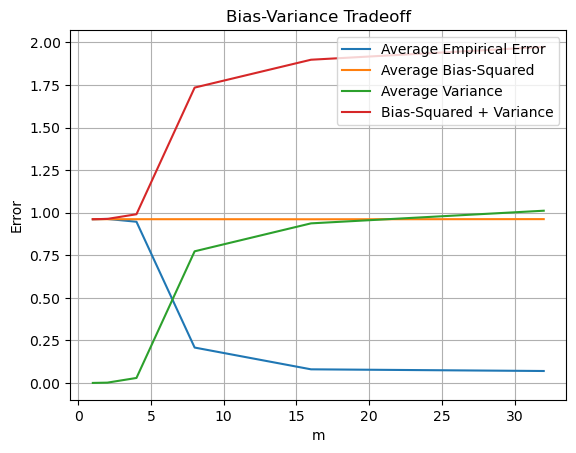

In [39]:
plt.plot(m_values, avg_empirical_error, label='Average Empirical Error')
plt.plot(m_values, avg_bias_squared, label='Average Bias-Squared')
plt.plot(m_values, avg_variance, label='Average Variance')
plt.plot(m_values, np.array(avg_bias_squared) + np.array(avg_variance), label='Bias-Squared + Variance')

plt.xlabel('m')
plt.ylabel('Error')
plt.title('Bias-Variance Tradeoff')
plt.legend()
plt.grid(True)
